In [1]:
!pip install yfinance


### Question 1: Extracting Tesla Stock Data Using yfinance

In [19]:
import yfinance as yf

In [20]:
# Extract Tesla stock data
tesla_stock = yf.Ticker("TSLA")
tesla_stock_data = tesla_stock.history(period="max")

In [25]:
# Reset the index
tesla_stock_data_reset = tesla_stock_data.reset_index()

tesla_stock_data_reset.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping 


In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Ensure the WebDriver is properly initialized
driver = webdriver.Chrome()  # Or your preferred driver

# Open the target URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)

# Add a delay to ensure the page loads completely
import time
time.sleep(5)

# Locate the table using XPath
try:
    # Locate the table
    table = driver.find_element(By.XPATH, '//table[contains(@class, "historical_data_table")]')
    
    # Extract the rows
    rows = table.text.split("\n")[2:]  # Skip header rows

    # Parse rows into a list of lists
    data = [row.split() for row in rows]

    # Convert data into a DataFrame
    tesla_revenue = pd.DataFrame(data, columns=["Year", "Revenue (Millions)"])
    tesla_revenue["Revenue (Millions)"] = tesla_revenue["Revenue (Millions)"].str.replace(",", "")

    # Display the last five rows
    print(tesla_revenue.tail())
except Exception as e:
    print("Error:", e)
finally:
    # Close the WebDriver
    driver.quit()

    Year Revenue (Millions)
10  2013              $2013
11  2012               $413
12  2011               $204
13  2010               $117
14  2009               $112


### Question 3 - Extracting GameStop Stock Data Using yfinance 


In [16]:
# Extract GameStop stock data
gme_stock = yf.Ticker("GME")
gme_data = gme_stock.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Save the data (optional)
gme_data.to_csv("gme_stock_data.csv", index=False)

# Display the first five rows
print("\nGameStop Stock Data (First 5 Rows):")
print(gme_data.head())



GameStop Stock Data (First 5 Rows):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [17]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping 

In [18]:
# Initialize WebDriver
driver = webdriver.Chrome()

# Navigate to the Macrotrends website
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
driver.get(url)

# Allow time for the page to load
import time
time.sleep(5)

try:
    # Locate the table containing revenue data
    table = driver.find_element(By.XPATH, '//table[contains(@class, "historical_data_table")]')
    
    # Extract table rows
    rows = table.text.split("\n")[2:]  # Skip header rows
    
    # Parse rows into a list of lists
    data = []
    for row in rows:
        cols = row.split()  # Split columns by whitespace
        year = cols[0]
        revenue = cols[1]
        data.append([year, revenue])
    
    # Create a pandas DataFrame
    gme_revenue = pd.DataFrame(data, columns=["Year", "Revenue (Millions)"])
    gme_revenue["Revenue (Millions)"] = gme_revenue["Revenue (Millions)"].str.replace(",", "")

    # Display the last five rows
    print(gme_revenue.tail())
except Exception as e:
    print("Error:", e)
finally:
    # Close the WebDriver
    driver.quit()

    Year Revenue (Millions)
11  2013              $8887
12  2012              $9551
13  2011              $9474
14  2010              $9078
15  2009              $8806


### Question 5: Tesla Stock and Revenue Dashboard

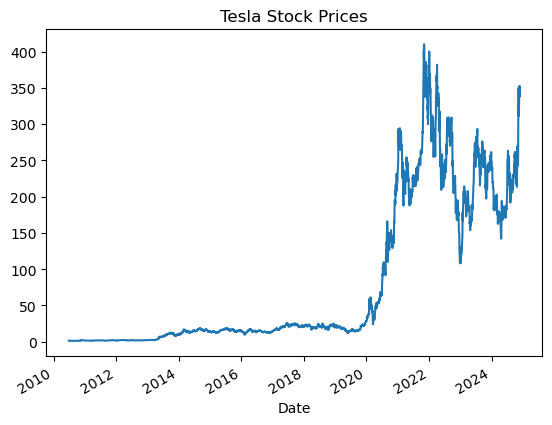

In [9]:
import matplotlib.pyplot as plt

# Example: Tesla Stock Data
tesla_stock_data["Close"].plot(title="Tesla Stock Prices")
plt.show()

# Combine this with Tesla's revenue data (after cleaning the scraped data).


### Question 6: GameStop Stock and Revenue Dashboard

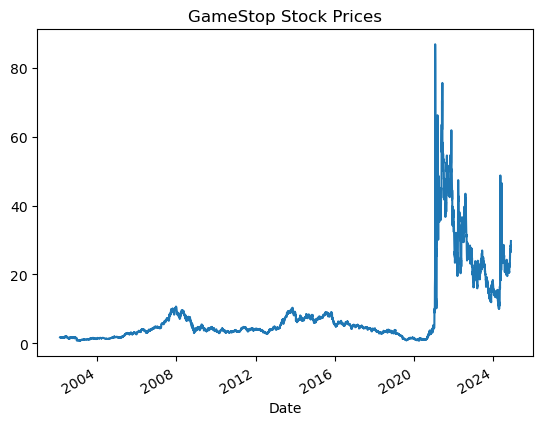

In [10]:
# Example: GameStop Stock Data
gamestop_stock_data["Close"].plot(title="GameStop Stock Prices")
plt.show()

# Combine this with GameStop's revenue data (after cleaning the scraped data).
